In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy


import seaborn as sns
from sklearn.metrics import confusion_matrix

from IPython.display import display, Math, Latex

import nn

# Part 2: Multinomial NN with Softmax, Categorical Cross Entropy, and One-Hot Encoding
## Problem 7

### Create Dataset
The data is meant to be RGB pairs, and the network has the task of sorting into red, green, blue, and black

In [2]:
data = pd.read_csv("A2B_Data_EliWeissler.csv")
data

,R,G,B,LABEL
0,0,255,0,green
1,39,234,32,green
2,27,233,21,green
3,40,241,31,green
4,19,210,32,green
5,255,0,0,red
6,229,31,21,red
7,232,9,9,red
8,238,21,34,red
9,255,10,18,red


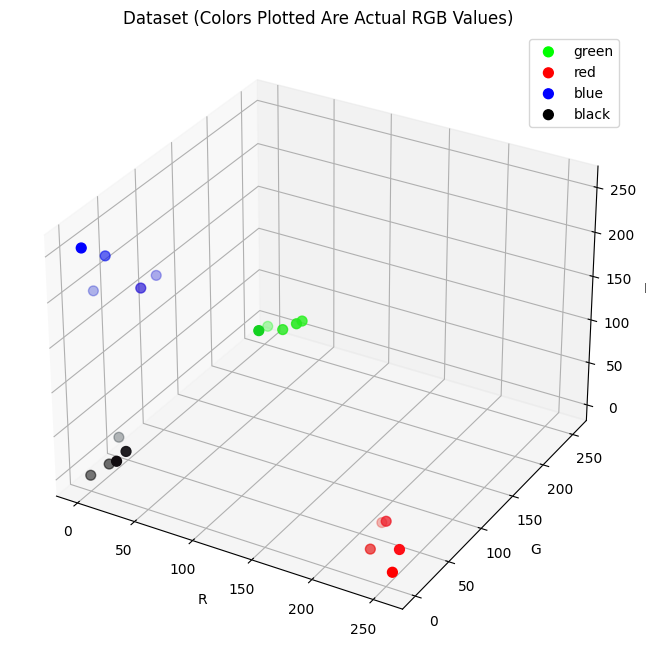

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches((8,8))
# Plotting
for i in ["green", "red", "blue", "black"]:
    data_subset = data[data["LABEL"] == i]
    ax.scatter(data_subset["R"], data_subset["G"], data_subset["B"],
               s=50, c=data_subset[["R", "G", "B"]].values/255, label=i)
ax.set_title('Dataset (Colors Plotted Are Actual RGB Values)')
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.legend()
plt.show()

### Create X and Y

In [4]:
X, Y = nn.normalize_data(data, OHE=True)
Math("X = " + sy.latex(sy.Matrix(np.round(X, 2))) +\
     "\quad Y = " + sy.latex(sy.Matrix(Y)))

<IPython.core.display.Math object>

### Build the network and verify that we are handling the softmax Jacobian correctly:

In [5]:
# Initialize network
input_size = 3
hidden_layers = [2]
output_size = 4
activation_fns = [nn.ReLU, nn.softmax]
loss_fn = nn.loss_CCE
random_initialize = True
network = nn.NeuralNetwork(input_size, output_size, hidden_layers,
                        activation_fns, loss_fn, random_initialize=random_initialize)

In [6]:
# Do the machinations needed to get dL/dz2
X_subset = X[0]
Y_subset = Y[0]
pred = network.feed_forward(X_subset)
network.calc_jacobian()
network.back_propagate(X_subset, Y_subset, pred, lr=1)

In [7]:
network.dLdz[1]

array([-0.78427128,  0.16925176,  0.19475677,  0.42026274])

In [8]:
pred-Y_subset

array([[-0.78427128,  0.16925176,  0.19475677,  0.42026274]])

Yay it's calculating it correctly!

### Now try actually training:

In [13]:
# Initialize network
input_size = 3
hidden_layers = [2]
output_size = 4
activation_fns = [nn.ReLU, nn.softmax]
loss_fn = nn.loss_CCE
random_initialize = True
network = nn.NeuralNetwork(input_size, output_size, hidden_layers,
                        activation_fns, loss_fn, random_initialize=random_initialize)
# Train network
epochs = 50000
lr = 0.1
batch_size = 7
loss = network.train(X, Y, X, Y, epochs=epochs, lr=lr, batch_size=batch_size, check_progress=1000)

Epoch 0 (out of 50000) -- Loss: 2.1202
Epoch 200 (out of 50000) -- Loss: 1.9301
Epoch 400 (out of 50000) -- Loss: 1.8154
Epoch 600 (out of 50000) -- Loss: 1.7447
Epoch 800 (out of 50000) -- Loss: 1.6479
Epoch 1000 (out of 50000) -- Loss: 1.5756
Epoch 1200 (out of 50000) -- Loss: 1.4702
Epoch 1400 (out of 50000) -- Loss: 1.4407
Epoch 1600 (out of 50000) -- Loss: 1.42
Epoch 1800 (out of 50000) -- Loss: 1.3509
Epoch 2000 (out of 50000) -- Loss: 1.2776
Epoch 2200 (out of 50000) -- Loss: 1.2554
Epoch 2400 (out of 50000) -- Loss: 1.1902
Epoch 2600 (out of 50000) -- Loss: 1.1537
Epoch 2800 (out of 50000) -- Loss: 1.1558
Epoch 3000 (out of 50000) -- Loss: 1.1337
Epoch 3200 (out of 50000) -- Loss: 1.0233
Epoch 3400 (out of 50000) -- Loss: 0.9693
Epoch 3600 (out of 50000) -- Loss: 0.9278
Epoch 3800 (out of 50000) -- Loss: 0.9246
Epoch 4000 (out of 50000) -- Loss: 0.8694
Epoch 4200 (out of 50000) -- Loss: 0.8535
Epoch 4400 (out of 50000) -- Loss: 0.7859
Epoch 4600 (out of 50000) -- Loss: 0.7871
E

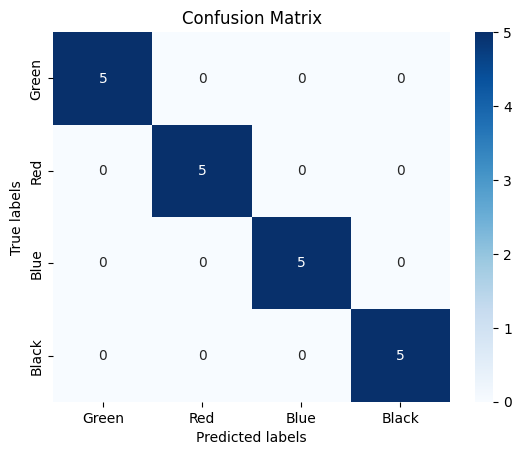

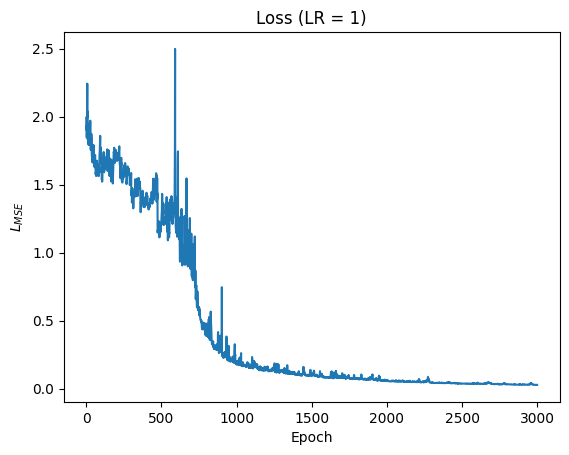

In [12]:
# Predict and plot
pred = network.feed_forward(X)
nn.plot_confusion_matrix(Y, pred, labels=["Green", "Red", "Blue", "Black"])
nn.plot_loss(loss, lr)